# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [4]:
city_weather = pd.DataFrame(cities, columns=['City'])
city_weather.head()

,City
0,ust-kuyga
1,kanepi
2,bluff
3,misawa
4,cabo san lucas


In [5]:
city_weather['Lat']=''
city_weather['Lng']=''
city_weather['Max Temp']=''
city_weather['Humidity']=''
city_weather['Cloudiness']=''
city_weather['Wind Speed']=''
city_weather['Country']=''
city_weather['Date']=''

city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-kuyga,,,,,,,,
1,kanepi,,,,,,,,
2,bluff,,,,,,,,
3,misawa,,,,,,,,
4,cabo san lucas,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [6]:
# Define Base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# building URL by adding Key and query (not query values - yet)
query_url = f"{base_url}appid={weather_api_key}&q=" 

print("Beginning Data Retrieval") 
print("-----------------------------") 

count = 0
set_count = 1

for index, row in city_weather.iterrows(): 
    city_name = row["City"]
    weather_response = requests.get(query_url + city_name)
    weather_json = weather_response.json()
    count +=1
     
    if count == 50:
        count = 1 
        set_count += 1 

    try:
        print(f"Processing Record {count} of Set {set_count}| {city_name}") 
        
        city_weather.loc[index,'Lat'] = weather_json['coord']['lat']
        city_weather.loc[index,'Lng'] = weather_json['coord']['lon']
        city_weather.loc[index,'Max Temp'] = weather_json['main']['temp_max']
        city_weather.loc[index,'Humidity'] = weather_json['main']['humidity']
        city_weather.loc[index,'Cloudiness'] = weather_json['clouds']['all']
        city_weather.loc[index,'Wind Speed'] = weather_json['wind']['speed']
        city_weather.loc[index,'Country'] = weather_json['sys']['country']
        city_weather.loc[index,'Date'] = weather_json['dt']
    
    except (KeyError, IndexError):
        print(f"City not found, skipping...")
  
print("-----------------------------") 
print("Data Retrieval Complete") 
print("-----------------------------") 

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1| ust-kuyga
Processing Record 2 of Set 1| kanepi
Processing Record 3 of Set 1| bluff
Processing Record 4 of Set 1| misawa
Processing Record 5 of Set 1| cabo san lucas
Processing Record 6 of Set 1| mount gambier
Processing Record 7 of Set 1| vestmannaeyjar
Processing Record 8 of Set 1| guerrero negro
Processing Record 9 of Set 1| jaora
Processing Record 10 of Set 1| cabra
Processing Record 11 of Set 1| ushuaia
Processing Record 12 of Set 1| cape town
Processing Record 13 of Set 1| illoqqortoormiut
City not found, skipping...
Processing Record 14 of Set 1| ola
Processing Record 15 of Set 1| hobart
Processing Record 16 of Set 1| inirida
Processing Record 17 of Set 1| souillac
Processing Record 18 of Set 1| port elizabeth
Processing Record 19 of Set 1| taolanaro
City not found, skipping...
Processing Record 20 of Set 1| san pedro
Processing Record 21 of Set 1| vaini
Processing Record 22 of Set 1| grand river

Processing Record 48 of Set 4| atuona
Processing Record 49 of Set 4| cathedral city
Processing Record 1 of Set 5| del rio
Processing Record 2 of Set 5| tongzi
Processing Record 3 of Set 5| port-gentil
Processing Record 4 of Set 5| pisco
Processing Record 5 of Set 5| kem
Processing Record 6 of Set 5| upernavik
Processing Record 7 of Set 5| rio grande
Processing Record 8 of Set 5| hithadhoo
Processing Record 9 of Set 5| mount isa
Processing Record 10 of Set 5| brae
Processing Record 11 of Set 5| maceio
Processing Record 12 of Set 5| beaverlodge
Processing Record 13 of Set 5| saint-augustin
Processing Record 14 of Set 5| port hardy
Processing Record 15 of Set 5| cervo
Processing Record 16 of Set 5| kilmez
City not found, skipping...
Processing Record 17 of Set 5| general pico
Processing Record 18 of Set 5| palmer
Processing Record 19 of Set 5| abonnema
Processing Record 20 of Set 5| codrington
Processing Record 21 of Set 5| gizo
Processing Record 22 of Set 5| imeni poliny osipenko
Process

Processing Record 43 of Set 8| araouane
Processing Record 44 of Set 8| anito
Processing Record 45 of Set 8| taltal
Processing Record 46 of Set 8| bandarbeyla
Processing Record 47 of Set 8| kamenskoye
City not found, skipping...
Processing Record 48 of Set 8| samarai
Processing Record 49 of Set 8| kieta
Processing Record 1 of Set 9| sao filipe
Processing Record 2 of Set 9| alofi
Processing Record 3 of Set 9| itoman
Processing Record 4 of Set 9| maragogi
Processing Record 5 of Set 9| saint-joseph
Processing Record 6 of Set 9| kahului
Processing Record 7 of Set 9| mahibadhoo
Processing Record 8 of Set 9| tateyama
Processing Record 9 of Set 9| nanortalik
Processing Record 10 of Set 9| sehithwa
Processing Record 11 of Set 9| arica
Processing Record 12 of Set 9| halifax
Processing Record 13 of Set 9| san carlos de bariloche
Processing Record 14 of Set 9| mazagao
Processing Record 15 of Set 9| guerande
Processing Record 16 of Set 9| sinazongwe
Processing Record 17 of Set 9| diego de almagro
P

Processing Record 37 of Set 12| gao
Processing Record 38 of Set 12| waddan
Processing Record 39 of Set 12| sao gabriel da cachoeira
Processing Record 40 of Set 12| baicoi
Processing Record 41 of Set 12| cayenne
Processing Record 42 of Set 12| secuieni
Processing Record 43 of Set 12| san quintin
Processing Record 44 of Set 12| bowen
Processing Record 45 of Set 12| sorvag
City not found, skipping...
Processing Record 46 of Set 12| birao
Processing Record 47 of Set 12| karema
Processing Record 48 of Set 12| santa marta
Processing Record 49 of Set 12| parana
Processing Record 1 of Set 13| zhezkazgan
Processing Record 2 of Set 13| linares
Processing Record 3 of Set 13| assiniboia
Processing Record 4 of Set 13| malatya
Processing Record 5 of Set 13| ravar
Processing Record 6 of Set 13| kollo
Processing Record 7 of Set 13| sanchez
Processing Record 8 of Set 13| coahuayana
Processing Record 9 of Set 13| ankazoabo
Processing Record 10 of Set 13| foundiougne
Processing Record 11 of Set 13| rocha

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_weather["Lat"] = pd.to_numeric(city_weather["Lat"])
city_weather["Lng"] = pd.to_numeric(city_weather["Lng"])
city_weather["Max Temp"] = pd.to_numeric(city_weather["Max Temp"])
city_weather["Max Temp"] = ((city_weather["Max Temp"] -273.15) * 9/5 +32) #converting Kelvin to Fahrenheit # Also could have used units = imperial method
city_weather["Humidity"] = pd.to_numeric(city_weather["Humidity"])
city_weather["Cloudiness"] = pd.to_numeric(city_weather["Cloudiness"])
city_weather["Wind Speed"] = pd.to_numeric(city_weather["Wind Speed"])
city_weather["Date"] = pd.to_datetime(city_weather["Date"], unit = "s")

city_weather['Date'] = pd.to_datetime(city_weather['Date']) 
city_weather['Date'] = city_weather['Date'].dt.strftime('%m-%d-%Y') 

city_weather_no_null = city_weather.dropna(how = "any")
city_weather_no_null.to_csv("city_weather.csv", index=False)
city_weather_no_null

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-kuyga,70.02,135.60,54.824,47.0,100.0,3.20,RU,08-18-2020
1,kanepi,57.98,26.76,50.000,87.0,100.0,1.30,EE,08-18-2020
2,bluff,-46.60,168.33,46.652,59.0,100.0,1.34,NZ,08-18-2020
3,misawa,40.68,141.36,78.800,65.0,40.0,3.10,JP,08-18-2020
4,cabo san lucas,22.89,-109.91,84.992,70.0,5.0,1.61,MX,08-18-2020
...,...,...,...,...,...,...,...,...,...
605,bella union,-30.28,-57.60,50.288,70.0,0.0,3.16,UY,08-18-2020
606,pochutla,15.74,-96.47,75.992,96.0,98.0,2.11,MX,08-18-2020
607,saint-georges,12.06,-61.75,80.600,88.0,75.0,2.60,GD,08-18-2020
608,usolye-sibirskoye,52.75,103.65,62.816,50.0,50.0,4.98,RU,08-18-2020


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_weather_no_null_humidity = city_weather_no_null.loc[city_weather_no_null['Humidity'] > 100, ]
print(city_weather_no_null_humidity)
print(f"Skipping since no cities have humidity > 100%")

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []
Skipping since no cities have humidity > 100%


In [9]:
#  Get the indices of cities that have humidity over 100%.
print(f"Skipping since no cities have humidity > 100%")

Skipping since no cities have humidity > 100%


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f"Skipping since no cities have humidity > 100%")

Skipping since no cities have humidity > 100%


In [11]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
print('Already exported to CSV in step "In [8]:"') 

Already exported to CSV in step "In [8]:"


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

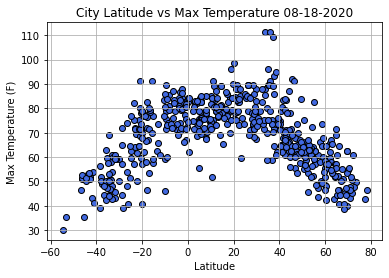

In [12]:
date = city_weather.loc[1,'Date']

plt.grid()
plt.scatter(city_weather_no_null['Lat'], city_weather_no_null['Max Temp'], facecolors="royalblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature {date}")
plt.savefig('lat_temp_all.png')

## Latitude vs. Humidity Plot

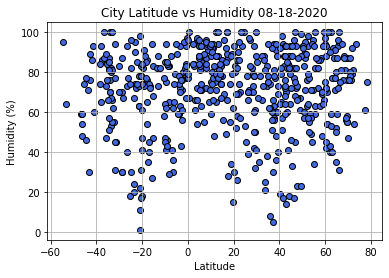

In [15]:
date = city_weather.loc[1,'Date']
plt.grid()
plt.scatter(city_weather_no_null['Lat'], city_weather_no_null['Humidity'], facecolors="royalblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity {date}")
plt.savefig('lat_hum_all.png')

## Latitude vs. Cloudiness Plot

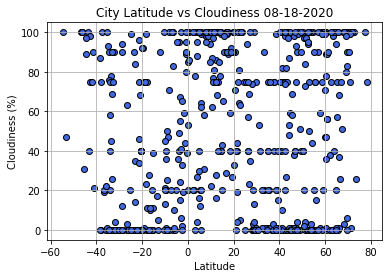

In [16]:
date = city_weather.loc[1,'Date']
plt.grid()
plt.scatter(city_weather_no_null['Lat'], city_weather_no_null['Cloudiness'], facecolors="royalblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness {date}")
plt.savefig('lat_cloud_all.png')

## Latitude vs. Wind Speed Plot

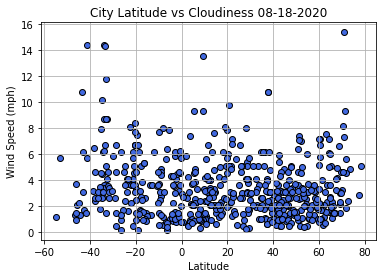

In [17]:
date = city_weather.loc[1,'Date']
plt.grid()
plt.scatter(city_weather_no_null['Lat'], city_weather_no_null['Wind Speed'], facecolors="royalblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Cloudiness {date}")
plt.savefig('lat_wind_all.png')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R Val is 0.4853813711987942


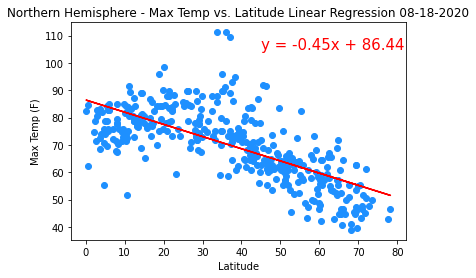

In [21]:
date = city_weather.loc[1,'Date']

north_hem = city_weather_no_null.loc[city_weather_no_null['Lat'] > 0,]

#plotting and formatting scatter
plt.scatter(north_hem['Lat'], north_hem['Max Temp'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression {date}")

#defining values
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(45,105),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
plt.savefig('north_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R Val is 0.6004318363518432


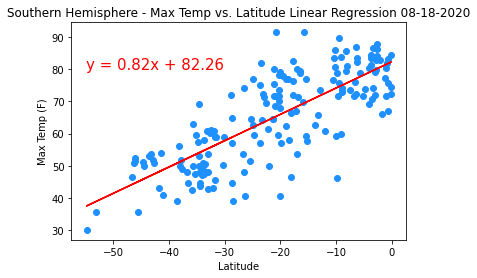

In [22]:
date = city_weather.loc[1,'Date']

south_hem = city_weather_no_null.loc[city_weather_no_null['Lat'] < 0,]

#plotting and formatting scatter
plt.scatter(south_hem['Lat'], south_hem['Max Temp'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression {date}")

#defining values
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(-55,80),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
plt.savefig('south_temp.png')

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Val is 0.011101204094018822


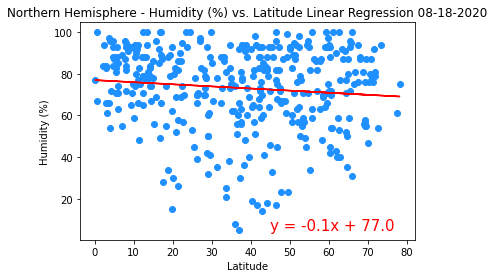

In [23]:
date = city_weather.loc[1,'Date']

north_hem = city_weather_no_null.loc[city_weather_no_null['Lat'] > 0,]

#plotting and formatting scatter
plt.scatter(north_hem['Lat'], north_hem['Humidity'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression {date}")

#defining values
x_values = north_hem['Lat']
y_values = north_hem['Humidity']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(45,5),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
plt.savefig('north_hum.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Val is 0.0003303391590867655


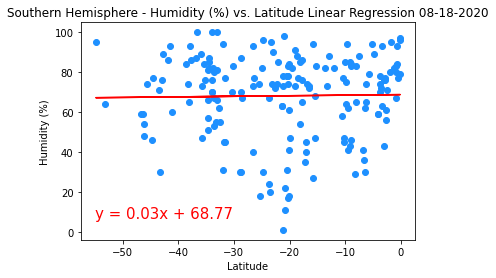

In [25]:
date = city_weather.loc[1,'Date']

south_hem = city_weather_no_null.loc[city_weather_no_null['Lat'] < 0,]

#plotting and formatting scatter
plt.scatter(south_hem['Lat'], south_hem['Humidity'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression {date}")

#defining values
x_values = south_hem['Lat']
y_values = south_hem['Humidity']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(-55,7),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
plt.savefig('south_hum.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Val is 0.012713319574414917


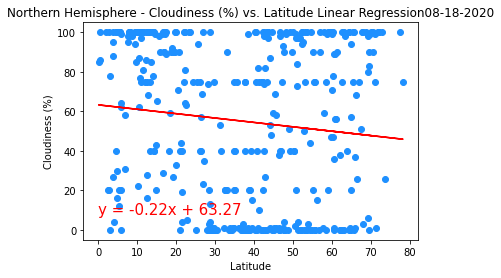

In [28]:
date = city_weather.loc[1,'Date']

north_hem = city_weather_no_null.loc[city_weather_no_null['Lat'] > 0,]

#plotting and formatting scatter
plt.scatter(north_hem['Lat'], north_hem['Cloudiness'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression{date}")

#defining values
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(0,8),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
plt.savefig('north_cloud.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Val is 0.007655062808188024


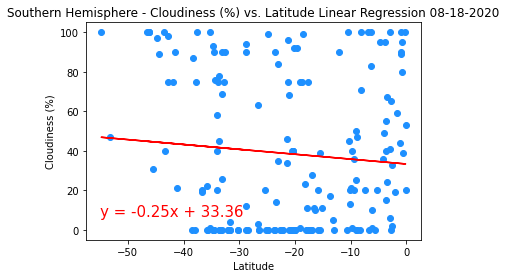

In [29]:
date = city_weather.loc[1,'Date']

south_hem = city_weather_no_null.loc[city_weather_no_null['Lat'] < 0,]

#plotting and formatting scatter
plt.scatter(south_hem['Lat'], south_hem['Cloudiness'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {date}")

#defining values
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(-55,7),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
plt.savefig('south_cloud.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Val is 0.0013902424375428998


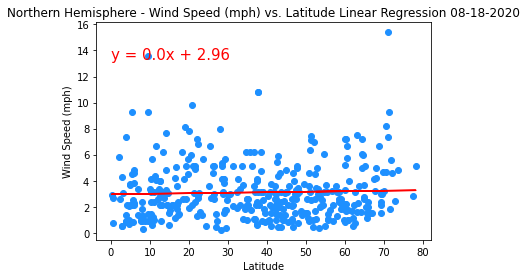

In [30]:
date = city_weather.loc[1,'Date']

north_hem = city_weather_no_null.loc[city_weather_no_null['Lat'] > 0,]

#plotting and formatting scatter
plt.scatter(north_hem['Lat'], north_hem['Wind Speed'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression {date}")

#defining values
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(0,13.3),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
plt.savefig('north_wind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Val is 0.03454344874833763


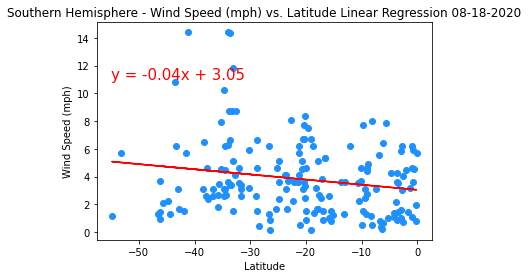

In [31]:
date = city_weather.loc[1,'Date']

south_hem = city_weather_no_null.loc[city_weather_no_null['Lat'] < 0,]

#plotting and formatting scatter
plt.scatter(south_hem['Lat'], south_hem['Wind Speed'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression {date}")

#defining values
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(-55,11),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
plt.savefig('south_wind.png')